# Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from PIL import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Reading datasets from drive

In [ ]:
dataSet1 = pd.read_excel('/content/drive/MyDrive/Medical Misinformation Detection Model/Datasets/Dataset 1/fake_and_true_news_dataset.xlsx', usecols="C,E", names=["text", "label"])
dataSet1 = dataSet1.replace(to_replace= {'label':{0:True, 1:False}}, value=None)

In [ ]:
dataSet2 = pd.read_excel('/content/drive/MyDrive/Medical Misinformation Detection Model/Datasets/Dataset 3/Constraint_Train.xlsx', usecols="B,C", names=["text", "label"])
dataSet2 = dataSet2.replace(to_replace= {'label':{'real':True, 'fake':False}}, value=None)

In [ ]:
dataSet3 = pd.read_csv('/content/drive/MyDrive/Medical Misinformation Detection Model/Datasets/Dataset 2/covidSelfDataset.csv', sep = ",")
dataSet3.rename(columns={'outcome':'label'}, inplace = True)
dataSet3 = dataSet3.replace(to_replace= {'label':{'real':True, 'fake':False}}, value=None)

In [ ]:
dataSet4 = pd.read_csv('/content/drive/MyDrive/Medical Misinformation Detection Model/Datasets/Dataset 3/test_with_labels.txt', sep = "\t")
dataSet4 = dataSet4.drop('id', axis = 1)
dataSet4.rename(columns={'tweet':'text'}, inplace = True)
dataSet4 = dataSet4.replace(to_replace= {'label':{'real':True, 'fake':False}}, value=None)

In [ ]:
dataSet5 = pd.read_csv('/content/drive/MyDrive/Medical Misinformation Detection Model/Datasets/Dataset 4/COVID Fake News Data.csv', sep = ",")
dataSet5.rename(columns={'headlines':'text', 'outcome':'label'}, inplace = True)
dataSet5 = dataSet5.replace(to_replace= {'label':{1:True, 0:False}}, value=None)

# Concating datasets without cleaning

In [ ]:
article_and_tweets_without_cleaning = pd.concat([dataSet1, dataSet2, dataSet3, dataSet4, dataSet5]).drop_duplicates().reset_index(drop=True)
tweets_without_cleaning = pd.concat([dataSet2, dataSet3, dataSet4, dataSet5]).drop_duplicates().reset_index(drop=True)

# Removing stopwords

In [ ]:
def remove_stop_words(text):
  stop_words = set(stopwords.words('english'))
  result=""
  for r in text.split():
    if not r in stop_words:
      result= result + " " + r
  return result

# Data cleaning

In [ ]:
def cleanText(text):
  text = re.sub("https?:\\\/\\\/\S*", "", text)
  text = re.sub("https?:\/\/\S*", "", text)
  text = re.sub('@\S+', '', text)
  text = re.sub('#\S+', '', text)
  text = re.sub('\n', ' ', text).strip()
  text = re.sub('\t', ' ', text).strip()
  text = re.sub('\d+', ' ', text).strip()
  text = text.encode('ascii', 'ignore').decode()
  text = re.sub(' +', ' ', text).strip()
  text = text.lower()
  for c in string.punctuation:
    text = text.replace(c, "")
  
  return remove_stop_words(text)

In [ ]:
article_and_tweets_with_cleaning = article_and_tweets_without_cleaning
tweets_with_cleaning = tweets_without_cleaning
for i in range (0, article_and_tweets_without_cleaning['text'].size):
  article_and_tweets_with_cleaning['text'][i] = cleanText(article_and_tweets_without_cleaning['text'][i])
for i in range (0, tweets_without_cleaning['text'].size):
  tweets_with_cleaning['text'][i] = cleanText(tweets_without_cleaning['text'][i])

drop_list1 = []
drop_list2 = []
for i in range (0, tweets_with_cleaning['text'].size):
  if len(tweets_with_cleaning['text'][i]) == 0:
    drop_list1.append(i)
tweets_with_cleaning = tweets_with_cleaning.drop(tweets_with_cleaning.index[drop_list1])
tweets_with_cleaning = tweets_with_cleaning.reset_index(drop=True)

for i in range (0, article_and_tweets_with_cleaning['text'].size):
  if len(article_and_tweets_with_cleaning['text'][i]) == 0:
    drop_list2.append(i)
article_and_tweets_with_cleaning = article_and_tweets_with_cleaning.drop(article_and_tweets_with_cleaning.index[drop_list2])
article_and_tweets_with_cleaning = article_and_tweets_with_cleaning.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Checking whether the DataSets Label is balanced or not!

In [ ]:
print("article and tweets dataset")
print(article_and_tweets_with_cleaning['label'].value_counts())

print("\ntweets dataset")
print(tweets_with_cleaning['label'].value_counts())

print(len(tweets_with_cleaning['label']))
print(len(article_and_tweets_with_cleaning['label']))

article and tweets dataset
False    13742
True     10971
Name: label, dtype: int64

tweets dataset
False    11724
True      9925
Name: label, dtype: int64
21649
24713


# Defining DataSet balancing method

In [ ]:
def make_dataset_balanced(dataSet):
  dataSet_false = dataSet[dataSet['label']==False]
  dataSet_true = dataSet[dataSet['label']==True]
  if len(dataSet_false) > len(dataSet_true):
    dataSet_false = dataSet_false.sample(dataSet_true.shape[0])
  else:
    dataSet_true = dataSet_true.sample(dataSet_false.shape[0])

  dataSet = pd.concat([dataSet_false, dataSet_true])
  return dataSet

# Calling DataSet balancing method

In [ ]:
article_and_tweets_with_cleaning = make_dataset_balanced(article_and_tweets_with_cleaning)
article_and_tweets_without_cleaning = make_dataset_balanced(article_and_tweets_without_cleaning)
tweets_with_cleaning = make_dataset_balanced(tweets_with_cleaning)
tweets_without_cleaning = make_dataset_balanced(tweets_without_cleaning)

# Datasets shuffle

In [ ]:
article_and_tweets_with_cleaning = article_and_tweets_with_cleaning.sample(frac=1).reset_index(drop=True)
article_and_tweets_without_cleaning = article_and_tweets_without_cleaning.sample(frac=1).reset_index(drop=True)
tweets_with_cleaning = tweets_with_cleaning.sample(frac=1).reset_index(drop=True)
tweets_without_cleaning = tweets_without_cleaning.sample(frac=1).reset_index(drop=True)

# Saving the datasets in Goolge Drive

In [ ]:
article_and_tweets_with_cleaning.to_csv('/content/drive/MyDrive/Medical Misinformation Detection Model/Datasets/Created Dataset/article_and_tweets_with_cleaning.csv', index=False)

article_and_tweets_without_cleaning.to_csv('/content/drive/MyDrive/Medical Misinformation Detection Model/Datasets/Created Dataset/article_and_tweets_without_cleaning.csv', index=False)

tweets_with_cleaning.to_csv('/content/drive/MyDrive/Medical Misinformation Detection Model/Datasets/Created Dataset/tweets_with_cleaning.csv', index=False)

tweets_without_cleaning.to_csv('/content/drive/MyDrive/Medical Misinformation Detection Model/Datasets/Created Dataset/tweets_without_cleaning.csv', index=False)

# Defining plot data distribution method

In [ ]:
def plot(dataSet, title):
  dataSet = dataSet.replace(to_replace= {'label':{True:'True', False:'False'}}, value=None)
  for i in range (0,len(dataSet['text'])):
    dataSet['length'] = len(dataSet['text'][i])
  for i in range (0,len(dataSet['text'])):
    dataSet['length'][i] = len(dataSet['text'][i])
  plt.xscale('log')
  bins = 1.15**(np.arange(0,75))
  plt.hist(dataSet[dataSet['label']=='True']['length'], bins = bins, alpha = 0.8)
  plt.hist(dataSet[dataSet['label']=='False']['length'], bins = bins, alpha = 0.8)
  plt.legend(('True','False'))
  plt.title(title)
  plt.xlabel('length')
  plt.ylabel('instances')
  plt.show()

# Calling plot data distribution method on the 4 datasets

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


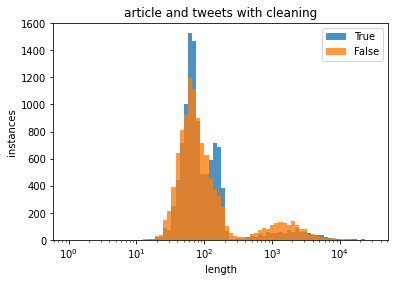

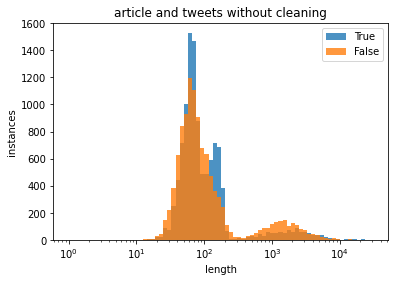

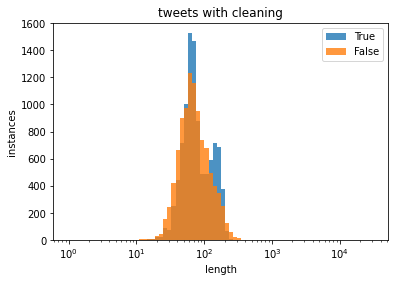

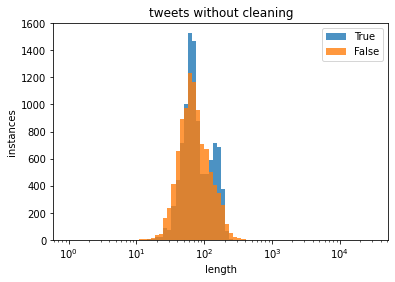

In [ ]:
plot(article_and_tweets_with_cleaning, 'article and tweets with cleaning')
plot(article_and_tweets_without_cleaning, 'article and tweets without cleaning')
plot(tweets_with_cleaning, 'tweets with cleaning')
plot(tweets_without_cleaning, 'tweets without cleaning')

# Spliting the fourth dataset into 2 strings

In [ ]:
dataSet_false_as_text = ' '.join(article_and_tweets_without_cleaning[article_and_tweets_without_cleaning['label']==False]['text'].tolist())
dataSet_true_as_text  = ' '.join(article_and_tweets_without_cleaning[article_and_tweets_without_cleaning['label']==True]['text'].tolist())

# Defining help method for world cloud coloring

In [ ]:
def transform_format(val):
    if val ==0 :
        return val
    else:
        return 255

# Creating the world cloud for the true news in fourth dataset

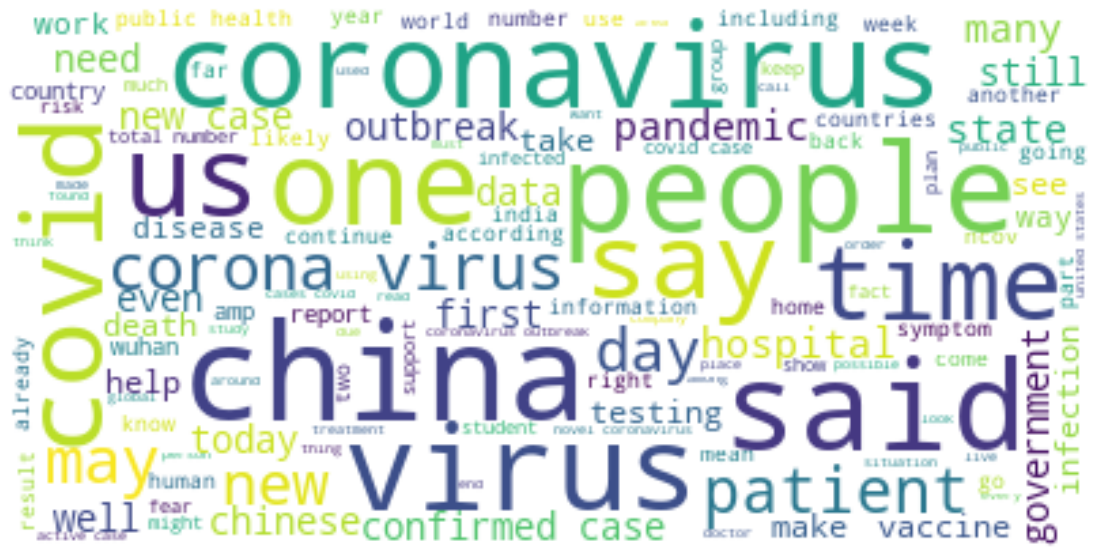

In [ ]:
wc = WordCloud(background_color="white", max_words=1000, contour_width=4, contour_color='skyblue', min_font_size = 5, max_font_size = 50)

wc.generate(dataSet_true_as_text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Creating the world cloud for the false news in fourth dataset

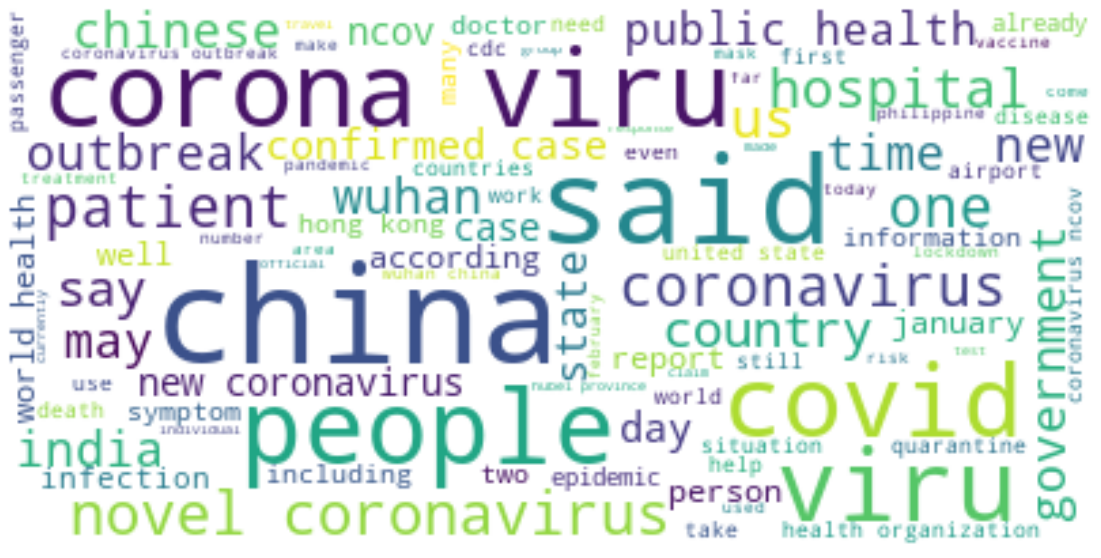

In [ ]:
wc = WordCloud(background_color="white", max_words=1000, contour_width=4, contour_color='skyblue', min_font_size = 5, max_font_size = 50)

wc.generate(dataSet_false_as_text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()